# Unsupervised Learning

Unsupervised learning is concerned with finding patterns and structures within unlabeled data. In this type of learning, the outputs or labels are unknown, and the objective is to uncover hidden insights or groupings.

Examples of unsupervised learning tasks include:

Clustering: Clustering algorithms aim to identify natural groupings or clusters within a dataset. This can be useful for market segmentation, where you want to identify distinct customer segments based on their purchasing behavior or demographic characteristics.

Dimensionality Reduction: Helps to reduce the number of features or variables in a dataset while preserving important information. This is beneficial for tasks like social network analysis, where large networks can be visualized and analyzed more effectively by reducing the data's dimensionality.

## K-Means Distances

K-Means is a popular unsupervised learning algorithm used for clustering analysis. It aims to partition a given dataset into k distinct clusters based on the similarity of data points. Each cluster is represented by its centroid, which is the mean of all the data points assigned to that cluster.

The concept of K-Means can be summarized as follows:

* Initialization: Choose k initial centroids randomly or using a specific heuristic.

* Assignment: Assign each data point to the nearest centroid based on a distance metric, commonly the Euclidean distance.

* Update: Recalculate the centroids as the mean of all the data points assigned to each cluster.

> Repeat steps 2 and 3 until convergence or until a maximum number of iterations is reached.

Mathematically, K-Means can be formulated as an optimization problem:
Minimize the objective function J, which represents the sum of squared distances between data points and their assigned centroids:

$$J = \sum{}|X_i-c_i|^2$$

Where:

$X_i$ represents a data point.

$c_i$ represents the centroid of the assigned cluster for $X_i$.

### Approaches in K-Means:

* *Classic K-Means*: The most common approach, where each data point is assigned to only one cluster.

* *K-Means++*: A variation of K-Means that improves the initialization step by selecting initial centroids that are far apart from each other, increasing the chances of obtaining better clusterings.

### Advantages of K-Means:

* *Simplicity and efficiency*: K-Means is relatively easy to understand and computationally efficient.

* *Scalability*: It can handle large datasets with a linear time complexity.

* *Interpretable* results: The resulting clusters can be easily interpreted and visualized.

### Disadvantages and considerations of K-Means:

* *Sensitivity to the initial centroid selection*: Different initializations may lead to different final clusterings.

* *Determining the optimal number of clusters (k)*: Selecting the correct value of k is crucial, and an incorrect choice may yield suboptimal results.

* *Assumes clusters with equal variance*: K-Means assumes that all clusters have similar sizes and variances, which may not always be true.

* *Affected by the scale of features*: The algorithm uses the Euclidean distance metric, so it is important to ensure that features are on similar scales.

K-Means is suitable for problems with clusters that are linearly separable or have well-defined centroids. It has been widely used in various applications such as customer segmentation, image compression, and anomaly detection. By iteratively updating centroids, K-Means iteratively improves the clustering solution, providing a practical and widely applicable unsupervised learning technique.


### K-Means Example

Using the Iris data we can compare the inference of the model by separate the clusters into 2, 3 and 4.

Target values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Model Clusters:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


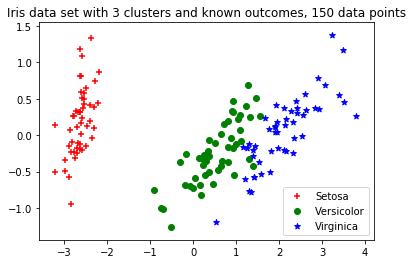

In [3]:
# Predictive Analytics for Dummies, 2nd Edition, Anasse Bari, Ph.d.
# K-Means (page 300)

# No training data is required for unsupervised learning, because generally we don't know the outcomes (targets).
# With K-means, the challenge is choosing the right number of clusters, ie the key problem.
# K-means is good for problems that:
#   a) Have a small number of clusters with proportional sizes
#   b) Are linearly separable
# This guessing at the number of clusters is a major limitation with K-means.

# Steps
# 1) Load data
# 2) Fit the model
# 3) Visualize the clusters
# 4) Tune parameters
# 5) repeat steps 2-4 until you get the clustering output you think yields the best results
# 6) Evaluate the model


import numpy as np
import sklearn
import scipy


# load a data set
from sklearn.datasets import load_iris
iris = load_iris()

# first 50 samples are: setosa
# second 50 samples are: versicolor
# third 50 samples are: virginica

# Run the full dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=111) # set random_state just to get the same output each time
kmeans.fit(iris.data)

# K-means has no notion of the data labels. It just knows it has to group data into 3 clusters
# randomly assigned 0, 1 and 2. The numbers assigned by k-means are arbitrary. It is up to us to 
# assign a meaningful label to these clusters (ie each class)
print ("Target values:")
print (iris.target)
print ("Model Clusters:")
print (kmeans.labels_)



# Plot the iris data. But first we reduce the number of dimensions
# using Principal Component Analysis (PCA)

# PCA can be used to visualize a dataset by reducing it to 2 components that
# can be plotted.
# PCA can also be used to reduce data sets that have a high dimentionality
# so that it becomes "easier" to deal with, and less computations are
# invloved.

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)

# See: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate
import pylab as pl

for i in range(0, pca_2d.shape[0]) :
    if   iris.target[i] == 0 :
        c1 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c="r", marker="+")
    elif iris.target[i] == 1 :
        c2 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c="g", marker="o")
    elif iris.target[i] == 2 :
        c3 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c="b", marker="*")

pl.legend ([c1, c2, c3], ["Setosa", "Versicolor", "Virginica"])
pl.title ('Iris data set with 3 clusters and known outcomes, 150 data points')
    
pl.show ()

Here we have the data set into the 3 real clusters. Now let's train the model.

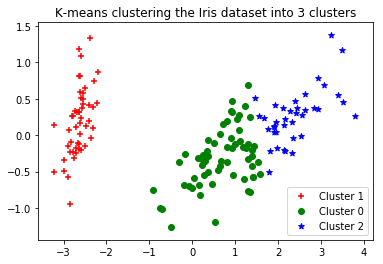

In [4]:
# Plot the k-means clusters.
# uses the previous pca_2d from iris.data, but indexes into the kmeans results
for i in range(0, pca_2d.shape[0]) :
    if   kmeans.labels_[i] == 1 :
        c1 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c="r", marker="+")
    elif kmeans.labels_[i] == 0 :
        c2 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c="g", marker="o")
    elif kmeans.labels_[i] == 2 :
        c3 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c="b", marker="*")

pl.legend ([c1, c2, c3], ["Cluster 1", "Cluster 0", "Cluster 2"])
pl.title ('K-means clustering the Iris dataset into 3 clusters')
    
pl.show ()

It's easy to see the K-Means does a really good job although thre is a couple of errors, finds the intersection of the 3 cluster on a pretty good way.
Now let's try by providing 2 and 4 number of clusters

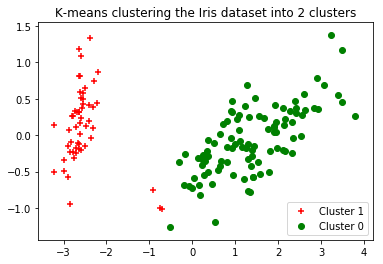

In [5]:
# We had apriori knowledge of the number of clusters. Here's what we get when we try
# 2 clusters and 4 clusters

# k = 2
kmeans = KMeans(n_clusters=2, random_state=111) # set random_state just to get the same output each time
kmeans.fit(iris.data)

for i in range(0, pca_2d.shape[0]) :
    if   kmeans.labels_[i] == 1 :
        c1 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c="r", marker="+")
    elif kmeans.labels_[i] == 0 :
        c2 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c="g", marker="o")


pl.legend ([c1, c2], ["Cluster 1", "Cluster 0"])
pl.title ('K-means clustering the Iris dataset into 2 clusters')
    
pl.show ()


In this case *Versicolor* & *Virginica* are absorbed in one "cluster".

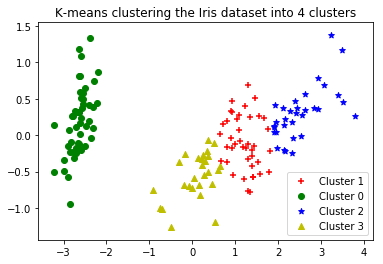

In [6]:
# k = 4
kmeans = KMeans(n_clusters=4, random_state=111) # set random_state just to get the same output each time
kmeans.fit(iris.data)

for i in range(0, pca_2d.shape[0]) :
    if   kmeans.labels_[i] == 1 :
        c1 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c="r", marker="+")
    elif kmeans.labels_[i] == 0 :
        c2 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c="g", marker="o")
    elif kmeans.labels_[i] == 2 :
        c3 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c="b", marker="*")
    elif kmeans.labels_[i] == 3 :
        c4 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c="y", marker="^")

pl.legend ([c1, c2, c3, c4], ["Cluster 1", "Cluster 0", "Cluster 2", "Cluster 3"])
pl.title ('K-means clustering the Iris dataset into 4 clusters')
    
pl.show ()


Here *Versicolor* is divided into two diferrent clusters.

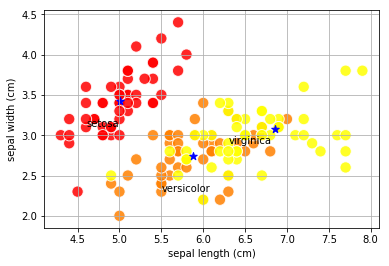

Iteration: 1 - Centroid 1: [7.433 3.033 6.275 1.992]
Iteration: 2 - Centroid 1: [7.211 3.161 6.122 2.15 ]
Iteration: 3 - Centroid 1: [4.735 2.948 1.765 0.343]
Iteration: 4 - Centroid 1: [5.854 2.742 4.346 1.409]
Iteration: 5 - Centroid 1: [6.85  3.074 5.742 2.071]
Iteration: 6 - Centroid 1: [4.771 3.071 1.625 0.307]
Iteration: 7 - Centroid 1: [6.85  3.074 5.742 2.071]
Iteration: 8 - Centroid 1: [5.006 3.428 1.462 0.246]
Iteration: 9 - Centroid 1: [5.006 3.428 1.462 0.246]


In [7]:
# Plot the centroids

import numpy as np
import sklearn
import scipy

# load a data set
from sklearn.datasets import load_iris
iris = load_iris()

# Run the full dataset
from sklearn.cluster import KMeans
import pylab as pl

# Plot centroids
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=999, n_init=1, random_state=101) 
kmeans.fit(iris.data)

#features = iris.data
#labels   = iris.target

pl.scatter(iris.data[:,0], iris.data[:,1], s=2**7, c=iris.target, edgecolors="white", alpha=0.85, cmap="autumn")
pl.grid()
pl.xlabel(iris.feature_names[0])
pl.ylabel(iris.feature_names[1])

# plot 1 point from each centroid center
pl.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=2**6, marker="*", c="blue")

# add the class names
for class_no in range(0,3) :
    pl.annotate(iris.target_names[class_no],
                 (iris.data[3+50*class_no,0], iris.data[3+50*class_no,1]))
    
pl.show()


# Monitor how centroids converge
np.set_printoptions(precision=3, suppress=True)

for iteration in range(1,10) : # 1-9
    
    kmeans = KMeans(n_clusters=3, init="random", max_iter=iteration, n_init=1)
    kmeans.fit(iris.data)
    print ("Iteration: %i - Centroid 1: %s" % (iteration, kmeans.cluster_centers_[1]))

